In [ ]:
# import the modules and function you will use here
import pandas as pd
import numpy as np


This problem deals with regularized regression. The boston dataset is described right after it is loaded in just by running the code that is aleardy there.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.Series(boston['target'])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

$(a)$ Split the data into a train and a test set

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42)
print(X_train, y_train)

         CRIM    ZN  INDUS  CHAS     NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
182   0.09103   0.0   2.46   0.0  0.4880  ...   3.0  193.0     17.8  394.12   4.82
155   3.53501   0.0  19.58   1.0  0.8710  ...   5.0  403.0     14.7   88.01  15.02
280   0.03578  20.0   3.33   0.0  0.4429  ...   5.0  216.0     14.9  387.31   3.76
126   0.38735   0.0  25.65   0.0  0.5810  ...   2.0  188.0     19.1  359.29  27.26
329   0.06724   0.0   3.24   0.0  0.4600  ...   4.0  430.0     16.9  375.21   7.34
..        ...   ...    ...   ...     ...  ...   ...    ...      ...     ...    ...
106   0.17120   0.0   8.56   0.0  0.5200  ...   5.0  384.0     20.9  395.67  18.66
270   0.29916  20.0   6.96   0.0  0.4640  ...   3.0  223.0     18.6  388.65  13.00
348   0.01501  80.0   2.01   0.0  0.4350  ...   4.0  280.0     17.0  390.94   5.99
435  11.16040   0.0  18.10   0.0  0.7400  ...  24.0  666.0     20.2  109.85  23.27
102   0.22876   0.0   8.56   0.0  0.5200  ...   5.0  384.0     20.9   70.80  10.63

[37

$(b)$ Use this data to fit an OLS, LASSO, ridge, and ElasticNet model on the data. For now, use the default for the penalty coefficient. Display the coefficients and test error for each.

In [ ]:


from sklearn.linear_model import LinearRegression as ols
reg = ols().fit(X_train,y_train)
# print("The training set accuracy is: " + str(reg.score(X_train,y_train)))
print("The test set error rate is: " + str(1 - reg.score(X_test,y_test)))

 
print("The coefficient values observed are: " + str(reg.coef_))

The test set error rate is: 0.3155732716472932
The coefficient values observed are: [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]


In [ ]:
# Elastic Net model

 
from sklearn.linear_model import ElasticNet
 
 
regr = ElasticNet().fit(X_train,y_train)
 
# print("Training set score: {:.3f}".format(regr.score(X_train,y_train)))
# print("Test set score: {:.3f}".format(regr.score(X_test,y_test)))
print("The Test error rate is:" + str(1-regr.score(X_test,y_test)))
 

 
print("The coefficient values observed are: " + str(regr.coef_))




The Test error rate is:0.34405862101440254
The coefficient values observed are: [-0.10270885  0.03414157 -0.00689058  0.         -0.          1.14428334
  0.01442808 -0.70930241  0.26472536 -0.01347162 -0.74428292  0.01200929
 -0.78282769]


In [ ]:
from sklearn.linear_model import Lasso 
 
#Fit our model using Lasso
 
 
lazzo = Lasso().fit(X_train,y_train)
 
#Print the training and test error rates.
 
# print(lazzo.score(X_train,y_train))
# print(lazzo.score(X_test,y_test))
print("The Test error rate is:" + str(1-lazzo.score(X_test,y_test)))
 
#Print the Lasso coefficients.
 
print("The coefficient values observed are: " + str(lazzo.coef_))


The Test error rate is:0.34830426199829567
The coefficient values observed are: [-0.0838981   0.02646051 -0.          0.         -0.          1.54544951
  0.01345772 -0.58282853  0.20738089 -0.01121302 -0.70500625  0.01198848
 -0.75783702]


In [ ]:
# The Ridge regression method

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)



print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print("The Test error rate is:" + str(1-ridge.score(X_test,y_test)))

 
print("The coefficient values observed are: " + str(ridge.coef_))


Training set score: 0.75
Test set score: 0.68
The Test error rate is:0.3210251672153923
The coefficient values observed are: [-0.12383039  0.03139178  0.01767668  2.54277179 -8.77249222  4.37980204
 -0.01537349 -1.29086084  0.24406848 -0.01082435 -0.83346553  0.01348642
 -0.53435396]


$(c)$ Describe the differences that you see in the coefficients and error. What is the cause of this difference in coefficients?

If we look at all of the test set scores we can see that OLS is doing the best (ridge does share a lot of characteristics as OLS). one reason for example we see a potential differenc ein the coefficents is that Lasso is throwing out some of the coefficients as it takes them to zero. Elastic net also takes some of the coefficients to zero. OLS has the lowest test error rate. 


$(d)$ Use K-fold cross validation to find an optimal penalty parameter for Ridge and Lasso.

In [ ]:
# Code used from Lecture. 
from sklearn.linear_model import LassoCV
lassocv= LassoCV(cv=5).fit(X_train, np.ravel(y_train))
lassocvalpha =Lasso(alpha = lassocv.alpha_,max_iter=100000).fit(X_train,y_train)
print('Lasso score on training set: {:.3f}'.format(lassocvalpha.score(X_train,y_train)))
print('Lasso score on test set: {:.3f}'.format(lassocvalpha.score(X_test,y_test)))

from sklearn.linear_model import RidgeCV
ridgecv= RidgeCV(cv=5).fit(X_train, np.ravel(y_train))
ridgecvalpha =Lasso(alpha = ridgecv.alpha_,max_iter=100000).fit(X_train,y_train)
print('Ridge score on training set: {:.3f}'.format(ridgecvalpha.score(X_train,y_train)))
print('Ridge score on test set: {:.3f}'.format(ridgecvalpha.score(X_test,y_test)))

Lasso score on training set: 0.715
Lasso score on test set: 0.664
Ridge score on training set: 0.737
Ridge score on test set: 0.666


$(e)$ Now use cross validation, to find the optimal penalty parameter. Use LOOCV and Kfold cross validation with K=5 to find optimal parameters for the ElasticNet model. How do the test errors and optimal parameters differ?

In [ ]:
from sklearn.model_selection import LeaveOneOut
import numpy as np
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV

# WITH LOOCV
my_cv = LeaveOneOut()


elasticNetCV= ElasticNetCV(cv=LeaveOneOut()).fit(X_train,np.ravel(y_train))


print("This is the best alpha" + str(elasticNetCV.alpha_))
print("The Test error rate is:" + str(1-elasticNetCV.score(X_test,y_test)))
 
 # K-folds = 5 method

elasticNetCV= ElasticNetCV(cv=5).fit(X_train,np.ravel(y_train))


print("This is the best alpha: " + str(elasticNetCV.alpha_))
print("The Test error rate with 5 k folds is:" + str(1-elasticNetCV.score(X_test,y_test)))

# The test errors are worse with LOOCV and k fold cross validation. 







This is the best alpha1.4140228709073313
The Test error rate is:0.3568667505313856
This is the best alpha: 1.4140228709073313
The Test error rate with 5 k folds is:0.3568667505313856


$(f)$ Now that we have tuned the models to perform about as well as they can, which one performs best on the training data? Which one performs best on the test data? Which of these models allow us to do effective causal inference with the coefficients? Why?

In [ ]:
print("The ols training error rate is:" + str(1-reg.score(X_train,y_train)))
print("The ols test set error rate is: " + str(1 - reg.score(X_test,y_test)))
print("The elastic training error rate is:" + str(1-regr.score(X_train,y_train)))
print("The  elastic Test error rate is:" + str(1-regr.score(X_test,y_test)))
print("The lasso trainingerror rate is:" + str(1-lazzo.score(X_train,y_train)))
print("The lasso Test error rate is:" + str(1-lazzo.score(X_test,y_test)))
print("The ridge training error rate is:" + str(1-ridge.score(X_train,y_train)))
print("The ridge test error rate is:" + str(1-ridge.score(X_test,y_test)))


# OLS performs best on the training but is pretty close to the ridge regression. as it is the smallest. OLS is the best to do causal inference with the coefficients since OLS produces unbiased estimates. 

The ols training error rate is:0.25191274013765597
The ols test set error rate is: 0.3155732716472932
The elastic training error rate is:0.3089119688630845
The  elastic Test error rate is:0.34405862101440254
The lasso trainingerror rate is:0.3051959256443715
The lasso Test error rate is:0.34830426199829567
The ridge training error rate is:0.25388382121158437
The ridge test error rate is:0.3210251672153923


For the next problem we will be using the `Carseats` data set that is available on learningsuite. Load the data and convert the text variables into dummies so that we can use them in the data. Pandas has a function called `get_dummies` that you might want to use.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
carseats = pd.read_csv('/content/drive/MyDrive/Econ 484/Carseats.csv')
carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
dumbcar= pd.get_dummies(carseats, columns=['Urban', 'US', 'ShelveLoc'])
dumbcar.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,1,9.50,138,73,11,276,120,42,17,0,1,0,1,1,0,0
1,2,11.22,111,48,16,260,83,65,10,0,1,0,1,0,1,0
2,3,10.06,113,35,10,269,80,59,12,0,1,0,1,0,0,1
3,4,7.40,117,100,4,466,97,55,14,0,1,0,1,0,0,1
4,5,4.15,141,64,3,340,128,38,13,0,1,1,0,1,0,0


Now that the data has only numeric columns, we can proceed to the analysis.  
Use `Sales` as the outcome variable  
(a) Split the data set into a training set and a test set.  
(b) Fit a regression tree to the training set with the default depth. What train and test MSE do you obtain?  
(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE? Plot a tree with a depth of 3, and interpret the results.  
(d) Use a bagging approach in order to analyze this data. What test MSE do you obtain? Look at the feature importances attribute of your model object to determine which variables are most important.  
(e) Use random forests to analyze this data. What test MSE do you obtain? Look at the feature importances attribute of your model object function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

In [ ]:
# Part A
y = dumbcar["Sales"]
X = dumbcar.loc[:,[x for x in dumbcar.columns if x != "Sales"]]
print(X.shape,y.shape)

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)


(400, 15) (400,)


In [ ]:
# Part B Decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score



Regarbol = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
print(Regarbol.score(X_test,y_test))
from sklearn import tree

print("Decision tree Training set score: {:.3f}".format(Regarbol.score(X_train,y_train)))
print("Decision tree Test : {:.3f}".format(Regarbol.score(X_test,y_test)))
# tree.plot_tree(Regarbol)
# Did not print out the tree its pretty nasty. 


0.4487954152093626
Decision tree Training set score: 1.000
Decision tree Test : 0.449


Best max_depth: 2
Accuracy  training set: 0.377
Accuracy test set: 0.443
Training set depth = 3: 0.499
Test set score  depth = 3: 0.455


[Text(418.5, 713.475, 'X[13] <= 0.5\nmse = 7.497\nsamples = 300\nvalue = 7.397'),
 Text(209.25, 509.625, 'X[5] <= 105.5\nmse = 6.088\nsamples = 239\nvalue = 6.78'),
 Text(104.625, 305.775, 'X[6] <= 49.5\nmse = 5.498\nsamples = 79\nvalue = 8.294'),
 Text(52.3125, 101.92499999999995, 'mse = 2.945\nsamples = 32\nvalue = 9.718'),
 Text(156.9375, 101.92499999999995, 'mse = 4.918\nsamples = 47\nvalue = 7.325'),
 Text(313.875, 305.775, 'X[12] <= 0.5\nmse = 4.689\nsamples = 160\nvalue = 6.032'),
 Text(261.5625, 101.92499999999995, 'mse = 4.084\nsamples = 114\nvalue = 6.54'),
 Text(366.1875, 101.92499999999995, 'mse = 3.963\nsamples = 46\nvalue = 4.774'),
 Text(627.75, 509.625, 'X[5] <= 135.0\nmse = 5.683\nsamples = 61\nvalue = 9.814'),
 Text(523.125, 305.775, 'X[5] <= 73.0\nmse = 3.74\nsamples = 48\nvalue = 10.572'),
 Text(470.8125, 101.92499999999995, 'mse = 1.171\nsamples = 3\nvalue = 14.327'),
 Text(575.4375, 101.92499999999995, 'mse = 2.909\nsamples = 45\nvalue = 10.321'),
 Text(732.375, 3

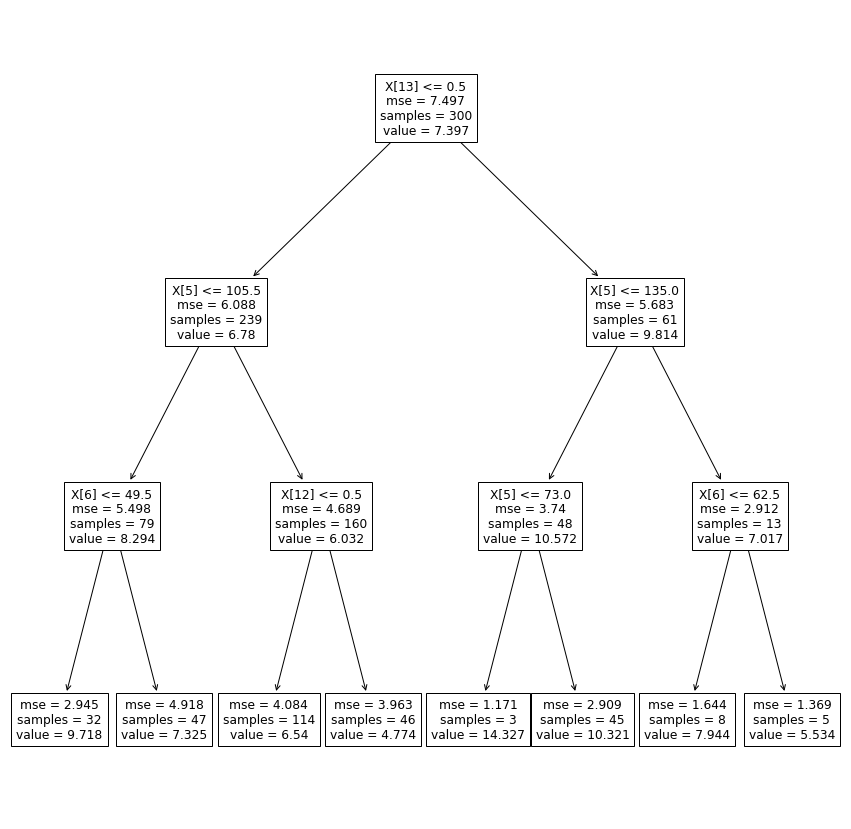

In [ ]:
# Part C
# Pruning doesnt make a huge imrpovement to our MSE
# The resulting tree splits on the shelveloc_good and on subsequent features if they are less than or = to .5 and the other group of features >.5   
from sklearn.model_selection import GridSearchCV 
depth_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search = GridSearchCV(Regarbol,depth_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(X_train,y_train)

print("Best max_depth:",best_model.best_estimator_.get_params()['max_depth'])
print("Accuracy  training set: {:.3f}".format(best_model.score(X_train, y_train)))
print("Accuracy test set: {:.3f}".format(best_model.score(X_test, y_test)))

regCV = DecisionTreeRegressor(max_depth = 3).fit(X_train,y_train)


print("Training set depth = 3: {:.3f}".format(regCV.score(X_train,y_train)))
print("Test set score  depth = 3: {:.3f}".format(regCV.score(X_test,y_test)))

from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
tree.plot_tree(regCV)


Training set score: 0.930
Test set score: 0.625


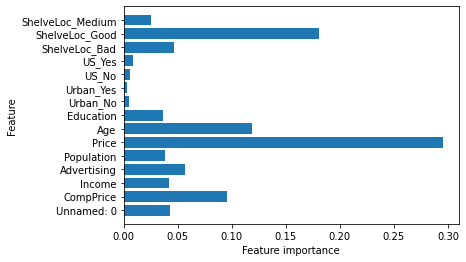

In [ ]:
# Part D this one was a doozy. 
# Looking at the plot we can see that Price is the most important feature followed by shelveloc_good.
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor().fit(X_train,y_train)

print("Training set score: {:.3f}".format(bag.score(X_train,y_train)))
print("Test set score: {:.3f}".format(bag.score(X_test,y_test)))

from matplotlib import pyplot as plt

featureImportances = []
for i in bag.estimators_:
    featureImportances.append(i.feature_importances_)
featureImportances = sum(featureImportances) / len(featureImportances)
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), featureImportances, align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(bag)


Training set score: 0.952
Test set score: 0.684
Training set test error rate with 3 freatures : 0.063
Test set test error rate with 3 features: 0.424
Training set test error rate with 6 freatures : 0.052
Test set test error rate with 6 features: 0.348
Training set test error rate with 13 freatures : 0.047
Test set test error rate with 13 features: 0.313


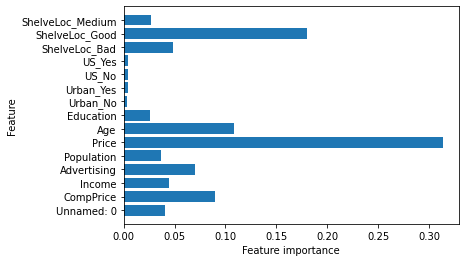

In [ ]:
# Part E
from sklearn.ensemble import RandomForestRegressor 

forest = RandomForestRegressor().fit(X_train,y_train)

print("Training set score: {:.3f}".format(forest.score(X_train,y_train)))
print("Test set score: {:.3f}".format(forest.score(X_test,y_test)))


def plot_feature_importances_car(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_car(forest)


randomforry= RandomForestRegressor(max_features=3, random_state=42).fit(X_train,y_train)


print("Training set test error rate with 3 freatures : {:.3f}".format(1-randomforry.score(X_train,y_train)))
print("Test set test error rate with 3 features: {:.3f}".format(1-randomforry.score(X_test,y_test)))

randomforry2= RandomForestRegressor(max_features=6, random_state=42).fit(X_train,y_train)


print("Training set test error rate with 6 freatures : {:.3f}".format(1-randomforry2.score(X_train,y_train)))
print("Test set test error rate with 6 features: {:.3f}".format(1-randomforry2.score(X_test,y_test)))

randomforry3= RandomForestRegressor(max_features=13, random_state=42).fit(X_train,y_train)


print("Training set test error rate with 13 freatures : {:.3f}".format(1-randomforry3.score(X_train,y_train)))
print("Test set test error rate with 13 features: {:.3f}".format(1-randomforry3.score(X_test,y_test)))


# Similar to the chart PRICE is stil the mostimportant followed by shelveloc althogh  shelveloc_good becomes even more important.
# as M increases we can see that our test error rate / test set score improves with each increase of features.

**We** will now use boosting to predict Log Salary in the `Hitters` data set.  
(a) Format the data appropriately for this analysis. Use 200 observations in your training set.  
(b) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis. Add a curve with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis. The shrinkage parameter is often referred to as the learning rate   
(c) Compare the test MSE of boosting to the test MSE of two of the penalized regression approaches that we discussed  
(d) Which variables appear to be the most important predictors in the boosted model?  
(e) The default for base estimator is a Decision Tree with a maximum depth of 3. Is that the optimal depth? Justify your response.  
(f) Now that the boosting model is tuned, let's compare the results to bagging and random forests. Report test errors for your models and discuss how they compare.

In [ ]:
hitters = pd.read_csv('/content/drive/MyDrive/Econ 484/Hitters.csv')

In [ ]:
hitters.head(10)

hitters = hitters.dropna()

hitters.shape



(263, 20)

In [ ]:
hitters = pd.get_dummies(hitters, columns=['League','Division','NewLeague'])
 
print(hitters.shape)
hitters.head()




(263, 23)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,0,1,0,1,0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,1,0,0,1,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,0,1,1,0,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,0,1,1,0,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,1,0,0,1,1,0


In [ ]:
hitters['log_Salary'] = np.log(hitters['Salary']) 
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N,log_Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,0,1,0,1,0,1,6.163315
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,1,0,0,1,1,0,6.173786
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,0,1,1,0,0,1,6.214608
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,0,1,1,0,0,1,4.516339
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,1,0,0,1,1,0,6.620073


In [ ]:

y = hitters['log_Salary']
x = hitters.loc[:,[x for x in hitters.columns if x != 'Salary' and x != 'log_Salary']]
print(x.shape, y.shape)



(263, 22) (263,)


In [ ]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,train_size = .7605)

# should have us at 200 observations

Training set score: 0.988
Test set score: 0.638
Training set score: 0.755
Test set score: 0.631
Training set score: 0.152
Test set score: 0.136
Training set score: 0.017
Test set score: 0.015
Training set score: 0.002
Test set score: 0.001
Training set score: 0.000
Test set score: -0.000


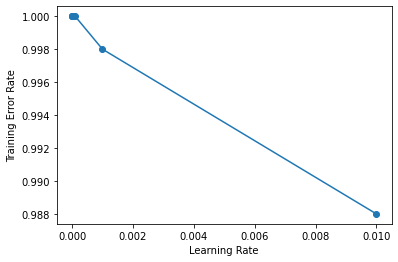

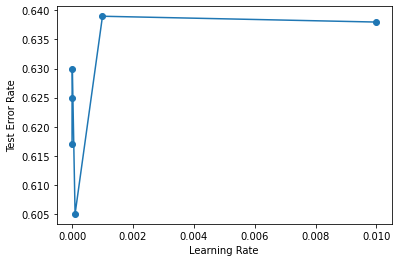

In [ ]:
# Part B 

from sklearn.ensemble import GradientBoostingRegressor
 

booster = GradientBoostingRegressor(n_estimators = 1000, random_state = 0, learning_rate = .01).fit(x_train, y_train)
booster2 = GradientBoostingRegressor(n_estimators = 1000, random_state = 0, learning_rate = .001).fit(x_train, y_train)
booster3 = GradientBoostingRegressor(n_estimators = 1000, random_state = 0, learning_rate = .0001).fit(x_train, y_train)
booster4 = GradientBoostingRegressor(n_estimators = 1000, random_state = 0, learning_rate = .00001).fit(x_train, y_train)
booster5 = GradientBoostingRegressor(n_estimators = 1000, random_state = 0, learning_rate = .000001).fit(x_train, y_train)
booster6 = GradientBoostingRegressor(n_estimators = 1000, random_state = 0, learning_rate = .0000001).fit(x_train, y_train)
 
 
print("Training set score: {:.3f}".format(booster.score(x_train,y_train)))
print("Test set score: {:.3f}".format(booster.score(x_test,y_test)))
 
print("Training set score: {:.3f}".format(booster2.score(x_train,y_train)))
print("Test set score: {:.3f}".format(booster2.score(x_test,y_test)))
 
print("Training set score: {:.3f}".format(booster3.score(x_train,y_train)))
print("Test set score: {:.3f}".format(booster3.score(x_test,y_test)))
 
print("Training set score: {:.3f}".format(booster4.score(x_train,y_train)))
print("Test set score: {:.3f}".format(booster4.score(x_test,y_test)))
 
print("Training set score: {:.3f}".format(booster5.score(x_train,y_train)))
print("Test set score: {:.3f}".format(booster5.score(x_test,y_test)))
 
print("Training set score: {:.3f}".format(booster6.score(x_train,y_train)))
print("Test set score: {:.3f}".format(booster6.score(x_test,y_test)))




data = np.array([
    [.01, .988],
    [.001, .998],
    [.0001, 1],
    [.00001, 1],
    [.000001, 1],
    [.0000001, 1]
])
x, y = data.T
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('Learning Rate')
plt.ylabel('Training Error Rate')
plt.show()
 
 
 
data = np.array([
    [.01, .638],
    [.001, .639],
    [.0001, .605],
    [.00001, .630],
    [.000001, .625],
    [.0000001, .617]
])
x, y = data.T
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('Learning Rate')
plt.ylabel('Test Error Rate')
plt.show()



In [ ]:
# Part C

from sklearn.linear_model import LassoCV
lassocv= LassoCV(cv=5).fit(x_train, np.ravel(y_train))
lassocvalpha =Lasso(alpha = lassocv.alpha_,max_iter=100000).fit(x_train,y_train)
print('Lasso score on training set: {:.3f}'.format(lassocvalpha.score(x_train,y_train)))
print('Lasso score on test set: {:.3f}'.format(lassocvalpha.score(x_test,y_test)))
 
from sklearn.linear_model import RidgeCV
ridgecv= RidgeCV(cv=5).fit(x_train, np.ravel(y_train))
ridgecvalpha =Lasso(alpha = ridgecv.alpha_,max_iter=100000).fit(x_train,y_train)
print('Ridge score on training set: {:.3f}'.format(ridgecvalpha.score(x_train,y_train)))
print('Ridge score on test set: {:.3f}'.format(ridgecvalpha.score(x_test,y_test)))

print("booster 1Test set score: {:.3f}".format(booster.score(x_test,y_test)))
print("booster2 Test set score: {:.3f}".format(booster2.score(x_test,y_test)))
print("booster3 Test set score: {:.3f}".format(booster3.score(x_test,y_test)))
print("booster 4Test set score: {:.3f}".format(booster4.score(x_test,y_test)))
print("booster5 Test set score: {:.3f}".format(booster5.score(x_test,y_test)))
print("booster 6 Test set score: {:.3f}".format(booster6.score(x_test,y_test)))

print("here we can view the different test scores of the boost method vs ridge and lasso test scores.")

# If i exclude booster 3 -6 because of the shrinkage paramaters i chose we can see that both the lasso and ridge are pretty close to hwo well they perform BUT they dont do as good as the boosted method can as boster 2 can get up to .638 
 


Lasso score on training set: 0.501
Lasso score on test set: 0.360
Ridge score on training set: 0.497
Ridge score on test set: 0.370
booster 1Test set score: 0.638
booster2 Test set score: 0.631
booster3 Test set score: 0.136
booster 4Test set score: 0.015
booster5 Test set score: 0.001
booster 6 Test set score: -0.000
here we can view the different test scores of the boost method vs ridge and lasso test scores.


It appears the most important feature is CAtBat <--  followed by CRuns and CHITS and CRBI


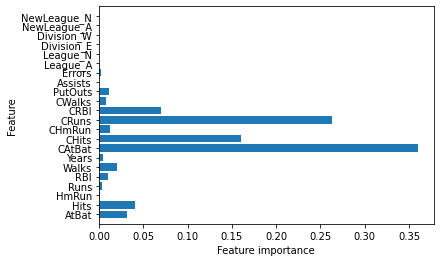

In [ ]:
# Part D

from matplotlib import pyplot as plt
def plot_feature_importances_car(model):
    n_features = x_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
 
plot_feature_importances_car(booster2)
print("It appears the most important feature is CAtBat <--  followed by CRuns and CHITS and CRBI")

In [ ]:
# part E

from sklearn.model_selection import GridSearchCV 

boostdefault = GradientBoostingRegressor(n_estimators = 1000, random_state = 42).fit(x_train, y_train)


depth_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
grid_search = GridSearchCV(boostdefault,depth_grid,n_jobs=-1)
best_model=grid_search.fit(x_train,y_train)
print("Best max_depth:",best_model.best_estimator_.get_params()['max_depth'])

print("Accuracy on training set: {:.3f}".format(
    best_model.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(best_model.score(x_test, y_test)))

#The optimal depth is 4 in this case and not 3 as when we run the crosss validation we find that the best max depth is 4. 
#

Best max_depth: 1
Accuracy on training set: 0.961
Accuracy on test set: 0.604


In [ ]:
# Part F 
forry = RandomForestRegressor().fit(x_train,y_train)

print("Training Random Forest training error: {:.3f}".format(1-forry.score(x_train,y_train)))
print("TestRandom Forest test error: {:.3f}".format(1-forry.score(x_test,y_test)))

print("boostdefault training error : {:.3f}".format(1-
    boostdefault.score(x_train, y_train)))
print("boostdefault test error  : {:.3f}".format(1-boostdefault.score(x_test, y_test)))

print("Training Random Forest score: {:.3f}".format(forry.score(x_train,y_train)))
print("TestRandom Forest score: {:.3f}".format(forry.score(x_test,y_test)))

print("boostdefault training score: {:.3f}".format(
    boostdefault.score(x_train, y_train)))
print("boostdefault test score : {:.3f}".format(boostdefault.score(x_test, y_test)))

#Its pretty close between Random forest and The boosted does better on the training than the random forest... but on the test set they perform close to as well to each other in this scenario



Training Random Forest training error: 0.034
TestRandom Forest test error: 0.389
boostdefault training error : 0.000
boostdefault test error  : 0.373
Training Random Forest score: 0.966
TestRandom Forest score: 0.611
boostdefault training score: 1.000
boostdefault test score : 0.627


In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.  

#### NOTE: SVM algortihms will often take longer than other models to train, particularly when doing cross validation

(a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.  
(b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.  
(c) Make an ROC curve for your model. The module scikitplot has a nice function you might want to use but you should eb able to make it on your own or another module if you desire.

In [ ]:
automoto = pd.read_csv('/content/drive/MyDrive/Econ 484/Auto (2).csv')



In [ ]:
# Part A
automoto['horsepower'] = automoto['horsepower'].replace(to_replace=r'?', value=None, regex=False)
automoto = automoto.dropna()
automoto['horsepower'] = automoto['horsepower'].astype(float)
automoto["median"] = 0
automoto.loc[automoto.mpg>=automoto.mpg.median(), "median"] = 1
y = automoto['median']
x = automoto.loc[:,[x for x in automoto.columns if x != "median" and x != 'mpg' and x != 'name']]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [ ]:
# Part B 
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC


listofcs = [1,5,10,30,50,75,1000000000]
svmlist = []
for x in range(len(listofcs)):
  svc = SVC(C=listofcs[x]).fit(x_train,y_train)
  print("The accuracy on the test set with C = " + str(listofcs[x]) + " is " + str(svc.score(x_test,y_test)))
  svmlist.append(svc)

# Alrighty so here if we look we can see that the BIGGER THE C the better the result is. Fore example a score of 1000000000 performs really well when scores are in a relatively same bracket they perform pretty similar but the increase in cost does increase the score.

The accuracy on the test set with C = 1 is 0.85
The accuracy on the test set with C = 5 is 0.85
The accuracy on the test set with C = 10 is 0.86
The accuracy on the test set with C = 30 is 0.86
The accuracy on the test set with C = 50 is 0.86
The accuracy on the test set with C = 75 is 0.86
The accuracy on the test set with C = 1000000000 is 0.91


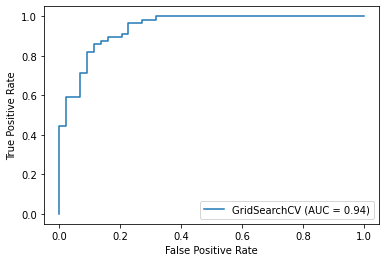

In [ ]:
# Part C

from sklearn.metrics import plot_roc_curve 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 


depth_grid = {'C': [1,50,100],}
grid_search = GridSearchCV(svc,depth_grid,cv=5,return_train_score=True)
best_model=grid_search.fit(x_train,y_train)

metrics.plot_roc_curve(best_model, x_test,y_test)
plt.show()

Below there are some generated datasets of varying structure that you will classifying is SVMs, plotting the data to see what it looks like will likey be helpful. Find the basis kernel that does best job classifying each of them. Because the data is two dimensional, it might be nice to use a library like mlxtend which has a function that will display decision regions form an svm using a one of their functions.

In [ ]:

# For all different plots for moons, circles, and blobs 'rbf' performs the best as we can see that it fits the data plots thebest. 


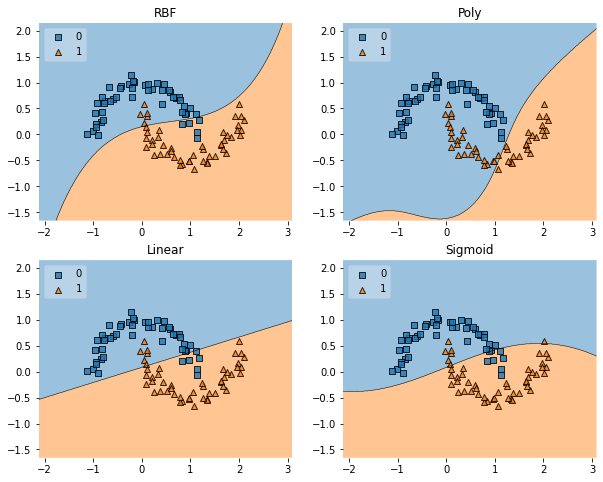

In [ ]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, shuffle=True, noise=1/10, random_state=123)



from sklearn.svm import SVC
svm =  SVC(C=10, gamma=0.1).fit(x, y)
svm2 = SVC(kernel='poly', C=10, gamma=0.1).fit(x, y)
svm3 = SVC(kernel='linear', C=10, gamma=0.1).fit(x, y)
svm4 = SVC(kernel='sigmoid', C=10, gamma=0.1).fit(x, y)






import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['RBF', 'Poly', 'Linear', 'Sigmoid']
for svm, lab, grd in zip([svm, svm2, svm3, svm4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    svm.fit(x, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x, y=y, clf=svm, legend=2)
    plt.title(lab)

plt.show()

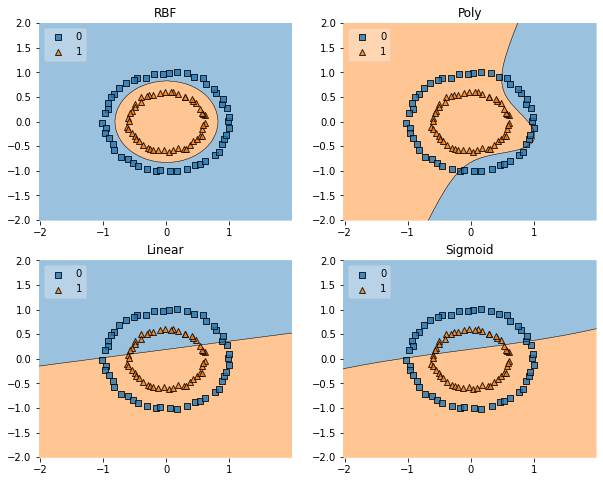

In [ ]:
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=100, shuffle=False, noise=1/50, random_state=123, factor=0.6)

from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

from sklearn.svm import SVC
svm =  SVC(C=10, gamma=0.1).fit(x, y)
svm2 = SVC(kernel='poly', C=10, gamma=0.1).fit(x, y)
svm3 = SVC(kernel='linear', C=10, gamma=0.1).fit(x, y)
svm4 = SVC(kernel='sigmoid', C=10, gamma=0.1).fit(x, y)






import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['RBF', 'Poly', 'Linear', 'Sigmoid']
for svm, lab, grd in zip([svm, svm2, svm3, svm4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    svm.fit(x, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x, y=y, clf=svm, legend=2)
    plt.title(lab)

plt.show()

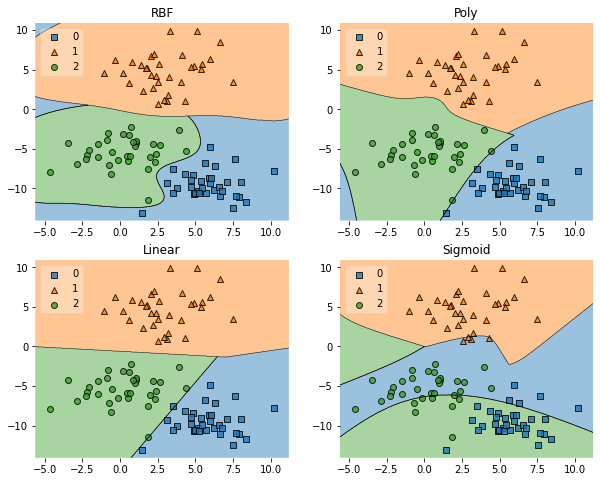

In [ ]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=2.0,
           center_box=(-10.0, 10.0), shuffle=True, random_state=10)

from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
svm =  SVC(C=10, gamma=0.1).fit(x, y)
svm2 = SVC(kernel='poly', C=10, gamma=0.1).fit(x, y)
svm3 = SVC(kernel='linear', C=10, gamma=0.1).fit(x, y)
svm4 = SVC(kernel='sigmoid', C=10, gamma=0.1).fit(x, y)


import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['RBF', 'Poly', 'Linear', 'Sigmoid']
for svm, lab, grd in zip([svm, svm2, svm3, svm4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    svm.fit(x, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x, y=y, clf=svm, legend=2)
    plt.title(lab)

plt.show()

